# Calculating the term structure of interest rates from short rates:

In this module, I demonstrate calculating the term structure of interest rates from the short rates. First we calculate the short rate lattice from the up and down factors (related to the volatility of the short rates). Then we calculate a number of Zero Coupon Bond Prices. The Zero-Coupon Bond price can be calculated using the formula:

$Z_{i,j}^k = \frac{1}{1+r_{i,j}} (q_u Z_{i+1,j+1} + q_d Z_{i+,j}) $

where $Z_{i,j}^k$ is the time i, state j price of a ZCB maturing at time k. From the range of values of $Z_{0,0}^k$, the short rate can be calculated using the formula:

$Z_{0,0}^k = \frac{1}{(1 + r_{0,0})^k}$.

$q_u$ and $q_d$ are the risk-neutral probabilities which we take as 0.5 and 0.5. We will show how the up and down factors are actually calibrated in a later module.

The spot rates can be calculated using the ZCB prices using the formula:

$Z_0^i*(1 + s_i)^i = FV$ 

where $Z_0^i$ is the present value of the ZCB maturing in i periods with Face Value FV.

The spot rates for all maturities is termed as the term-structure of interest rates.


The functions defined here are:

plot_term_structure(r_0,n_u,d): plots the term structure using the initial rate, number of periods and up and down factors of the short rate

term_structure(r_0,n,u,d): returns an array of spot rates using the initial rate, number of periods and up and down factors of the short rate

zcb_price(r_0,n,u,d, fv): calculates the Zero Coupon Bond price lattice of ZCB with spot rate r_0, maturing in n periods, where u and d are the up and down factors of the short rate and the face value of the bond is fv

short_rate(r_0,n,u,d): calculates the short rate lattice given initial rate r_0, number of periods n, up and down factors u and d respectively

In [86]:
import numpy as np
import matplotlib.pyplot as plt

In [110]:
def plot_term_structure(r_0,n,u,d):
    
    spot_rates = term_structure(r_0,n,u,d)
    
    maturity = np.arange(1,n+1)
    
    plt.figure(figsize=(10,6))
    
    plt.plot(maturity, spot_rates*100, 'r.-')
    
    plt.ylabel('Spot Rates (%)', size = 20)
    plt.xlabel('# of Periods', size = 20)
    
    plt.tick_params(labelsize = 14)
    
    plt.title('Term Structure of Interest Rates')
    
    return

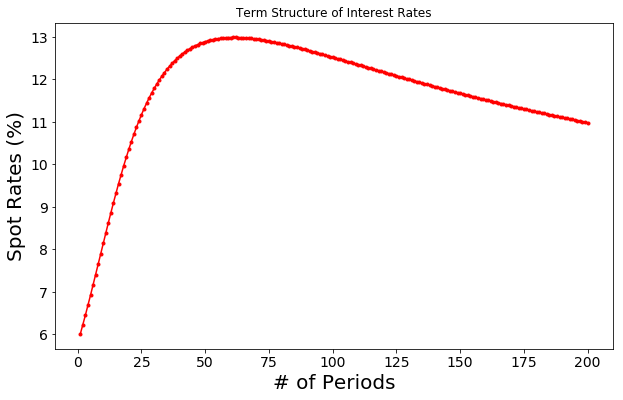

In [114]:
plot_term_structure(6.0,200,1.25,0.9)

In [73]:
def term_structure(r_0, n, u, d):
    
    #r_0: the present rate
    #n: number of periods
    #u,d: up and down factor of the short rates
    
    zcb_prices = np.zeros(n+1)   #the zcb function is defined below
    
    for i in range(1,n+1):
        zcb_prices[i] = zcb_price(r_0, i, u, d)[0,0]
        
    spot_rates = np.zeros(n+1)
    
    for i in range(1,n+1):
        spot_rates[i] = (100.0/zcb_prices[i])**(1/i) - 1.0
           
    return spot_rates[1:]
    

In [12]:
def zcb_price(r_0, n, u, d, fv=100):
    
    #r_0: present short rate
    #n:maturity period
    #u,d : up and down factor of short rate
    #fv: face value
    
    q = 0.5    #the risk-neutral probability
    
    rate = short_rate(r_0, n-1, u, d)
    
    zcb = np.zeros((n+1,n+1))
    
    #calculating the price at the terminal node
    
    zcb[n,:] = fv
    
    
    for i in range(n-1,-1,-1):
        for j in range(i+1):
            zcb[i,j] = (1/(1+rate[i,j]/100))*(q*zcb[i+1,j+1]+(1-q)*zcb[i+1,j])
    
    return zcb

In [2]:
def short_rate(r_0,n,u,d):
    
    #S_0 = initial stock price
    #n: number of periods
    #u,d = up/down movement in each step
    
    rate = np.zeros((n+1,n+1))
    rate[0,0] = r_0
    
    for i in range(1,n+1):
        rate[i,0] = rate[i-1,0]*d
        for j in range(1,i+1):
            rate[i,j] = rate[i-1,j-1]*u
        
        
    return rate